Visualisation and exploration of the data

In [1]:
pip freeze > visualisation_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imblearn
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from pandas.plotting import scatter_matrix



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\carth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\carth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Read in match_df data

In [3]:
data_df = pd.read_csv("Project_data_csv")

In [4]:
data_df.shape

(277819, 31)

In [5]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Over and Balls Total,Remaining Team Value,Remaining Average Team Value,Start Team Value,DL %,Tie Score,Ground RPO,Ground RPW,Batting Team Result DL,DL Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,55,260,32.5,380,38.6,103,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,55,260,32.5,380,38.8,103,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,55,260,32.5,380,38.9,104,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,55,260,32.5,380,39.1,104,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,55,260,32.5,380,39.3,105,4.79,29.31,Australia,Yes


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277819 entries, 0 to 277818
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    277819 non-null  int64  
 1   batting_team                  277819 non-null  object 
 2   bowling_team                  277819 non-null  object 
 3   innings_num                   277819 non-null  int64  
 4   over_col                      277819 non-null  int64  
 5   ball_col                      277819 non-null  int64  
 6   Match ID                      277819 non-null  int64  
 7   Start Date                    277819 non-null  object 
 8   Runs                          277819 non-null  int64  
 9   Running Total                 277819 non-null  int64  
 10  Batter out                    277819 non-null  object 
 11  Wickets taken                 277819 non-null  int64  
 12  Start Team                    277819 non-nul

Creating a column for who wins - team 1 (team who bowled second), team 2(team who batted second) or a tie.  Can define these as bowling team and batting team respectively because I'm only using second innings data.

In [7]:
#Wanted to choose -1, 0 and 1 but couldn't because sparse categorical entropy won't take -ve value
winner_no = []
winner_name = []

for index, row in data_df.iterrows():
    #Team 2 wins
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
        winner_name.append("Team 2")

    #Team 1 wins
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(0)
        winner_name.append("Team 1")

    #Tie
    else:
       winner_no.append(1)
       winner_name.append("Tie")

winner_name_df = pd.DataFrame(winner_name, columns=['Winner'])
winner_no_df = pd.DataFrame(winner_no, columns=['Winner_num'])

data_df['Winner_num'] = winner_no_df['Winner_num']

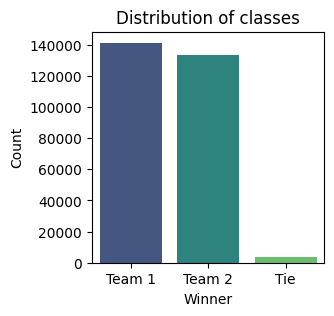

In [8]:
#sns.set(style="whitegrid")
plt.figure(figsize=(3, 3))
sns.countplot(x='Winner', data=winner_name_df, palette='viridis')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of classes')
plt.show()


In [9]:
winner_name_df.value_counts(normalize=True)

Winner
Team 1    0.508327
Team 2    0.479146
Tie       0.012526
Name: proportion, dtype: float64

Showed that it's slightly favourable to have batted first in the data I have

In [10]:
team = ['Team 1', 'Team 2', 'Tie']
win_per =[]
for w in winner_name_df.value_counts(normalize=True): win_per.append(w)

win_per_df = pd.DataFrame(list(zip(team, win_per)), columns =['Winner', 'Percentage'])

print(tabulate(win_per_df, headers='keys', tablefmt='psql'))


+----+----------+--------------+
|    | Winner   |   Percentage |
|----+----------+--------------|
|  0 | Team 1   |    0.508327  |
|  1 | Team 2   |    0.479146  |
|  2 | Tie      |    0.0125261 |
+----+----------+--------------+


Creating the same again but this time looking at distribution of classes of the winners as decided by the DL method

In [11]:
dl_winner_name = []
dl_winner_no = []
for index, row in data_df.iterrows():
    #Team 2 wins according to DL
    if row['Batting Team Result DL'] == row['batting_team']:
        dl_winner_no.append(2)
        dl_winner_name.append("Team 2")


    #Team 1 wins according to DL
    elif row['Batting Team Result DL'] == row['bowling_team']:
        dl_winner_name.append("Team 1")
        dl_winner_no.append(0)

    #Tie
    else:
       dl_winner_name.append("Tie")
       dl_winner_no.append(1)


dl_winner_name_df = pd.DataFrame(dl_winner_name, columns=['DL Winner'])
dl_winner_no_df =pd.DataFrame(dl_winner_no, columns=['DL Winner_num'])

In [12]:
team = ['Team 1', 'Team 2', 'Tie']
dl_win_per =[]
for dlw in dl_winner_name_df.value_counts(normalize=True): dl_win_per.append(dlw)

dl_win_per_df = pd.DataFrame(list(zip(team, dl_win_per)), columns =['DL Winner', 'Percentage'])

print(tabulate(dl_win_per_df, headers='keys', tablefmt='psql'))

+----+-------------+--------------+
|    | DL Winner   |   Percentage |
|----+-------------+--------------|
|  0 | Team 1      |   0.499714   |
|  1 | Team 2      |   0.49046    |
|  2 | Tie         |   0.00982654 |
+----+-------------+--------------+


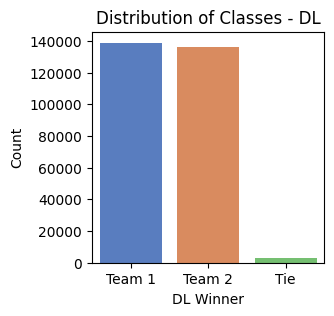

In [13]:
#sns.set(style="whitegrid")
plt.figure(figsize=[3, 3])
sns.countplot(x='DL Winner', data=dl_winner_name_df, palette='muted')

# Adding labels and title
plt.ylabel('Count')
plt.title('Distribution of Classes - DL')
plt.show()


Under DL it's more likely that Team 1 will be misclassified as Team 2 than Team 2 is misclassified as Team 1.

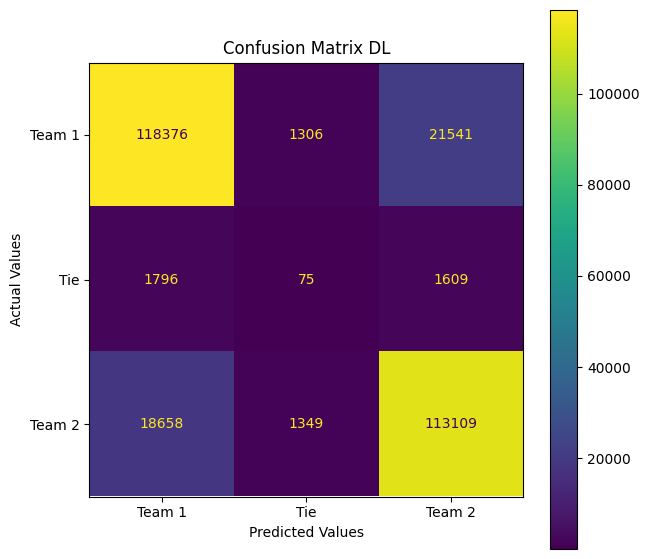

              precision    recall  f1-score   support

      Team 1       0.85      0.84      0.85    141223
         Tie       0.03      0.02      0.02      3480
      Team 2       0.83      0.85      0.84    133116

    accuracy                           0.83    277819
   macro avg       0.57      0.57      0.57    277819
weighted avg       0.83      0.83      0.83    277819



In [14]:
labels= ['Team 1', 'Tie', 'Team 2']
cm = confusion_matrix(winner_no_df['Winner_num'], dl_winner_no_df['DL Winner_num'])
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(7,7))
cmd.plot(ax=ax)
plt.grid(False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
ax.set_title('Confusion Matrix DL')
plt.show()

print(classification_report(winner_no_df['Winner_num'], dl_winner_no_df['DL Winner_num'], target_names=labels))

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (1,2,3 respectively.)

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remainder feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [15]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remainder']]
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [16]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
0,0,3,260,32.50,380,4.79,29.31,0,29.5
1,1,3,260,32.50,380,4.79,29.31,0,29.4
2,2,3,260,32.50,380,4.79,29.31,0,29.3
3,3,3,260,32.50,380,4.79,29.31,0,29.2
4,4,3,260,32.50,380,4.79,29.31,0,29.1
...,...,...,...,...,...,...,...,...,...
277814,277814,3,230,28.75,340,5.40,31.64,2,3.0
277815,277815,3,230,28.75,340,5.40,31.64,2,2.5
277816,277816,3,230,28.75,340,5.40,31.64,2,2.4
277817,277817,3,230,28.75,340,5.40,31.64,2,2.3


In [17]:
data_df.describe()

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remainder
count,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000,277819.000000
mean,138909.000000,4.347428,208.961698,30.513688,376.205479,4.941863,30.340351,0.970819,17.309806
std,80199.581555,2.190083,82.984653,4.010652,21.525565,0.352421,3.456723,0.993290,7.878214
min,0.000000,0.000000,20.000000,20.000000,300.000000,3.980000,20.560000,0.000000,0.000000
25%,69454.500000,3.000000,140.000000,28.333333,360.000000,4.720000,28.180000,0.000000,11.200000
50%,138909.000000,4.000000,220.000000,31.250000,380.000000,4.850000,29.640000,0.000000,18.100000
75%,208363.500000,6.000000,270.000000,33.333333,390.000000,5.090000,32.430000,2.000000,24.100000
max,277818.000000,10.000000,430.000000,40.000000,480.000000,6.910000,53.080000,2.000000,30.000000


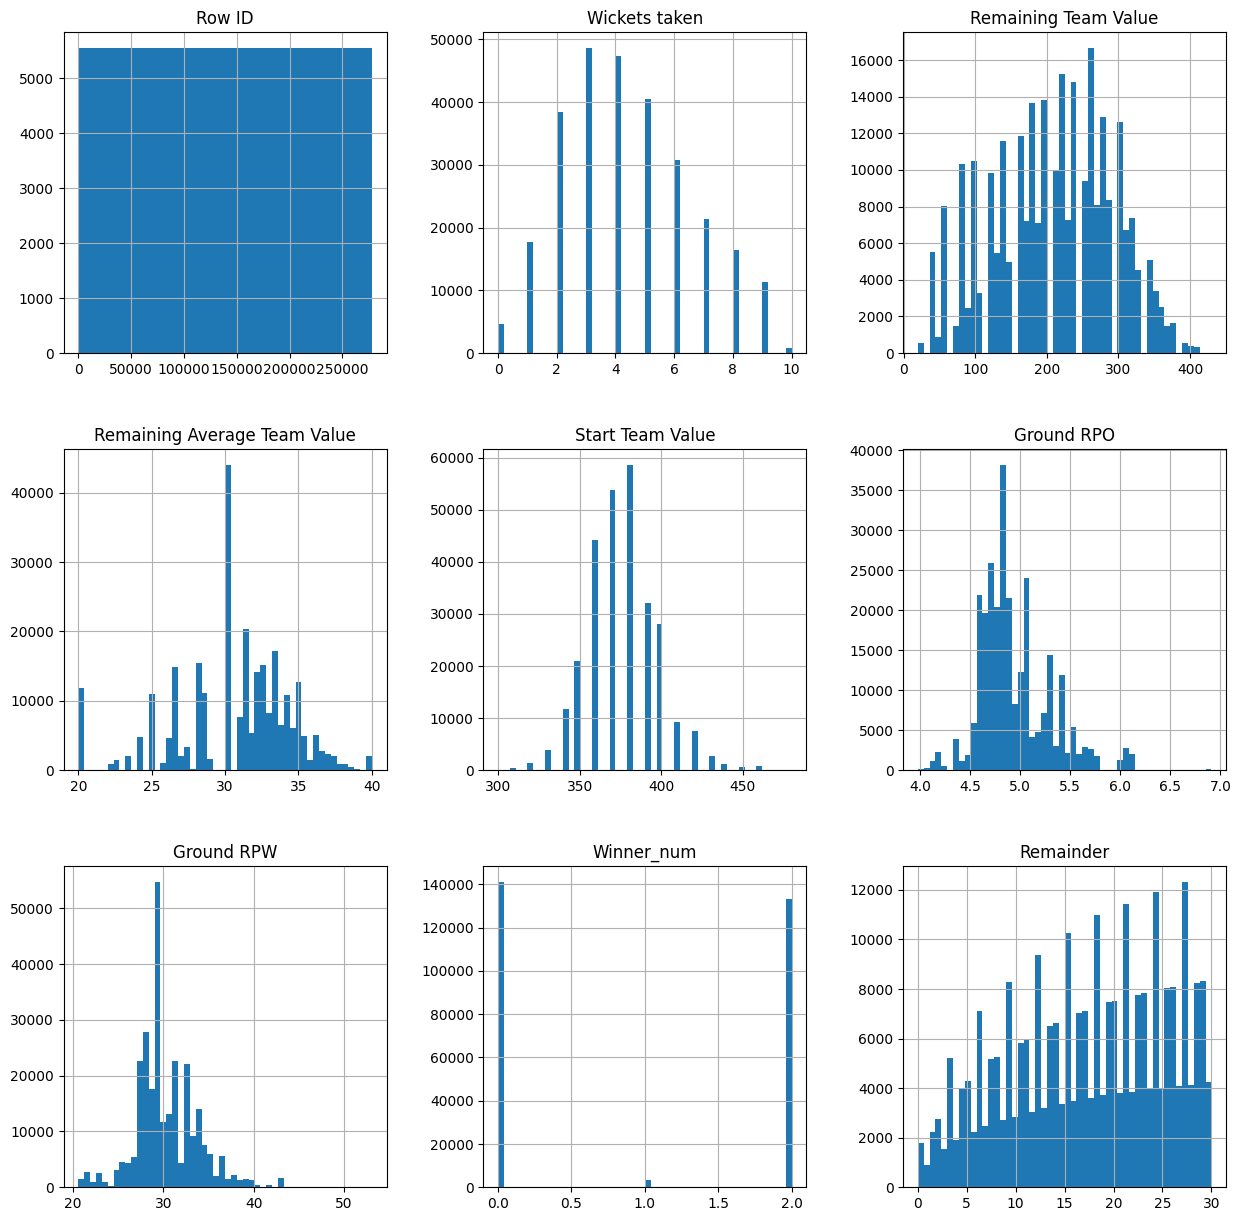

In [18]:
data_df.hist(bins=50, figsize=(15, 15))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder distribution looks odd because the numbers aren't full continuous i.e. will only be in multiples of 6

Wickets taken and team value seem to follow Gaussian distribution and have low standard deviation (2.19 and 2.53 respectively)
Turned remaining overs and balls into remainder number and std much lower for that(7.87 compared to 47.24)

The other attributes have low standard deviation too but ground rpo, ground rpw have lowest

Splitting the data - Not using random sampling because it may end up with oversampling/ undersampling due to the imbalance of data.

In [19]:
from zlib import crc32

def is_id_in_set(identifier, set_ratio, hash_function):
    return hash_function(np.int64(identifier)) < set_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, validation_ratio, id_column, random_state=None):
    np.random.seed(random_state)  # For reproducibility

    # Different hash functions for test and validation sets for indepdendence
    hash_for_test = lambda x: crc32(x) & 0xffffffff
    hash_for_validation = lambda x: crc32(x + 1) & 0xffffffff

    ids = data[id_column]

    in_test_set = ids.apply(lambda id_: is_id_in_set(id_, test_ratio, hash_for_test))
    in_validation_set = ids.apply(lambda id_: is_id_in_set(id_, validation_ratio, hash_for_validation))

    # Combine the conditions to get the training set
    in_train_set = ~in_test_set & ~in_validation_set

    return data.loc[in_train_set], data.loc[in_validation_set], data.loc[in_test_set]

train_set, validation_set, test_set = split_data_with_id_hash(data_df, test_ratio=0.1, validation_ratio=0.2, id_column='Row ID', random_state=7)


In [20]:
test_set.shape

(27782, 9)

In [21]:
train_set.shape

(198047, 9)

In [22]:
validation_set.shape

(55563, 9)

Dropping Row ID and creating CSVs from the split data

In [23]:
data_train = train_set.copy()
data_train.drop('Row ID', axis=1, inplace=True)
data_train = data_train.reset_index(drop=True)
data_train.to_csv("data_train_csv")

data_test = test_set.copy()
data_test.drop('Row ID', axis=1, inplace=True)
data_test = data_test.reset_index(drop=True)
data_test.to_csv("data_test_csv")

data_val = validation_set.copy()
data_val.drop('Row ID', axis=1, inplace=True)
data_val = data_val.reset_index(drop=True)
data_val.to_csv("data_val_csv")

Challenging to see much from scattergraph below because whilst the data is continuous it does have levels e.g. Team Value will only go down by a certain amount (between 20 and 40 per wicket)etc

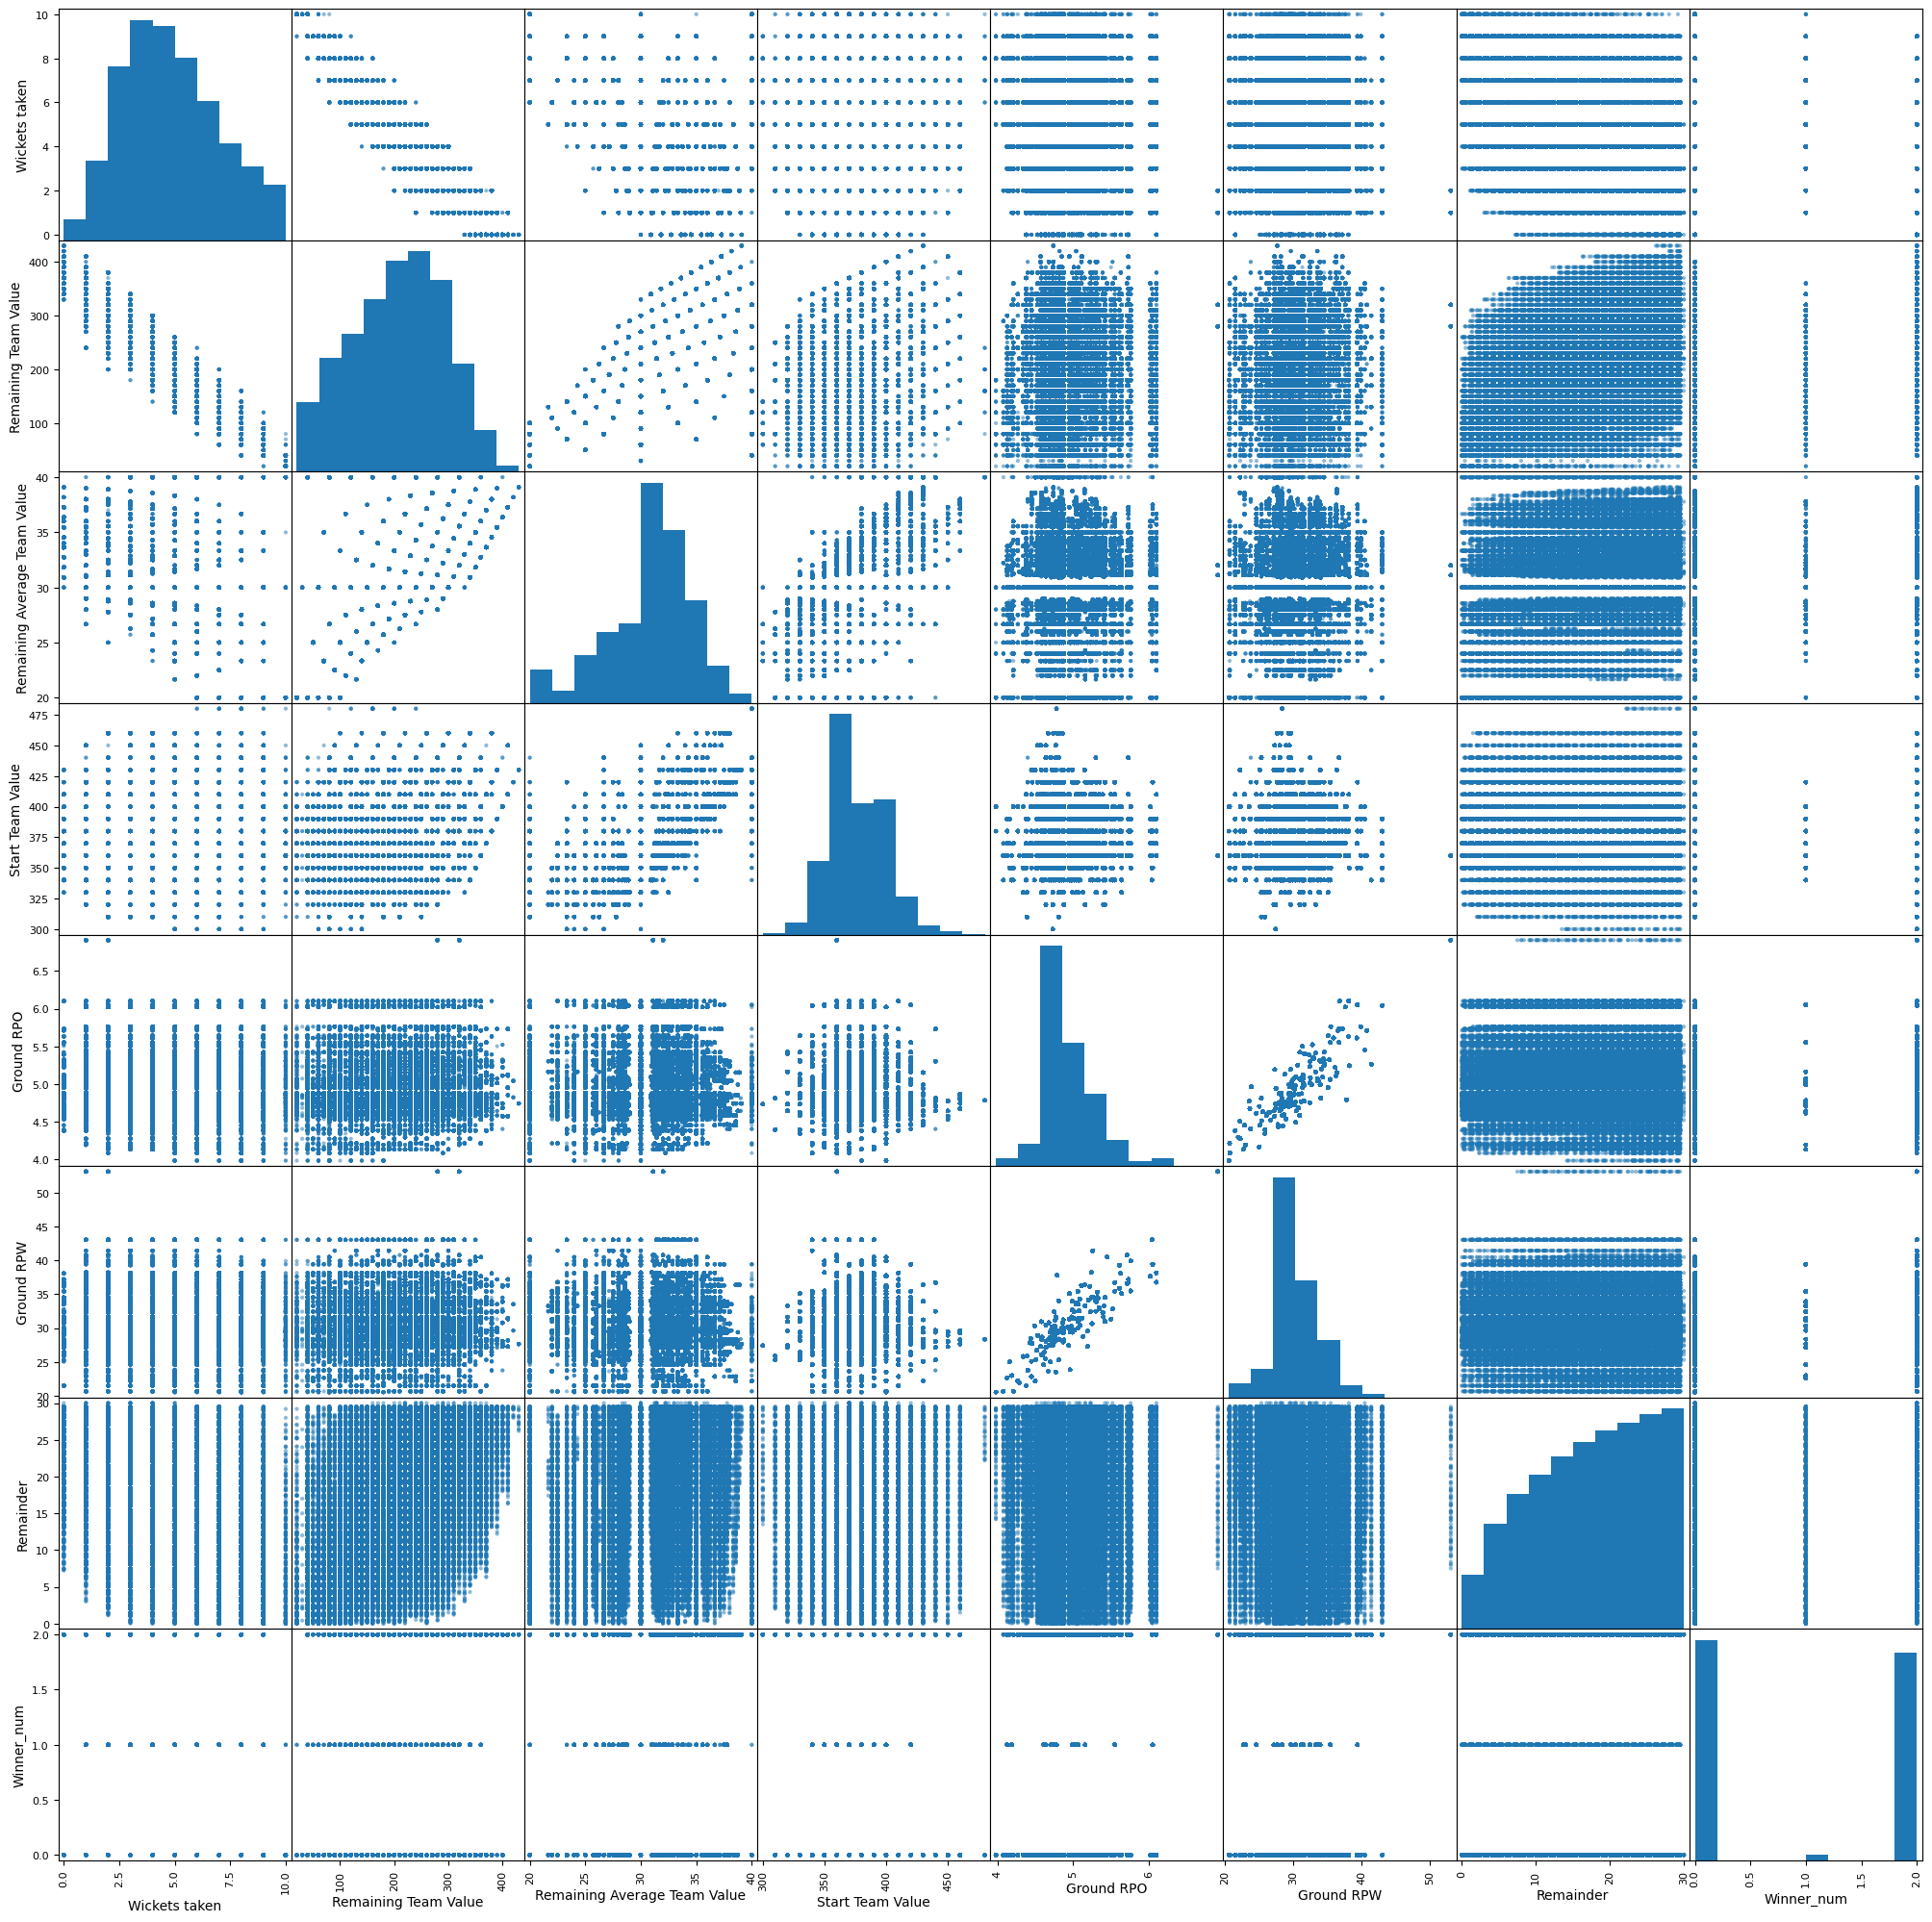

In [25]:
attributes = ["Wickets taken", "Remaining Team Value", "Remaining Average Team Value", "Start Team Value", "Ground RPO", "Ground RPW", "Remainder", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(25, 25))
plt.show()

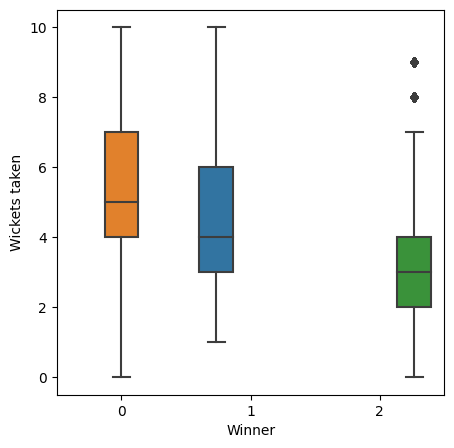

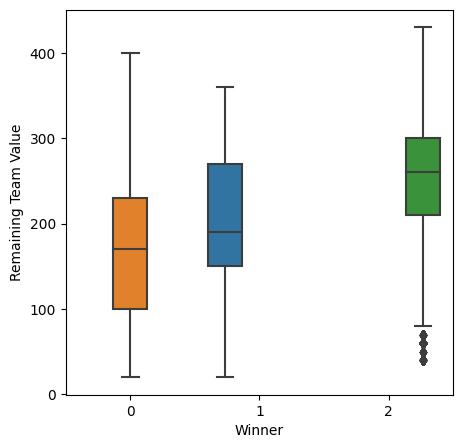

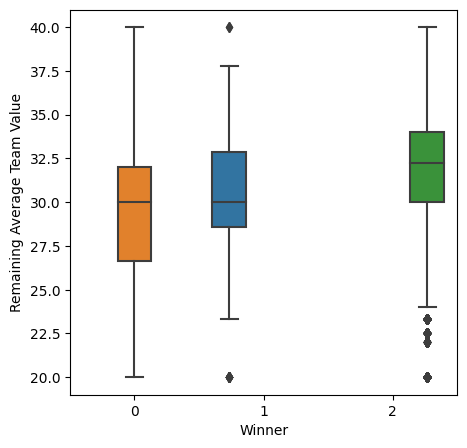

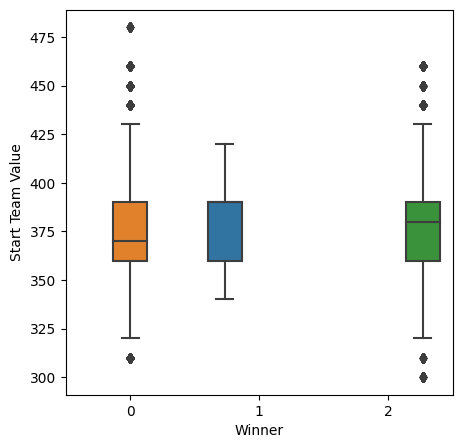

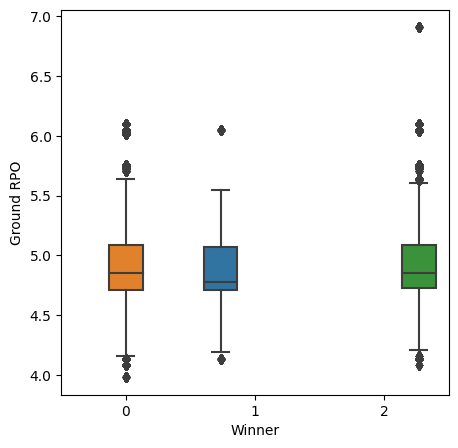

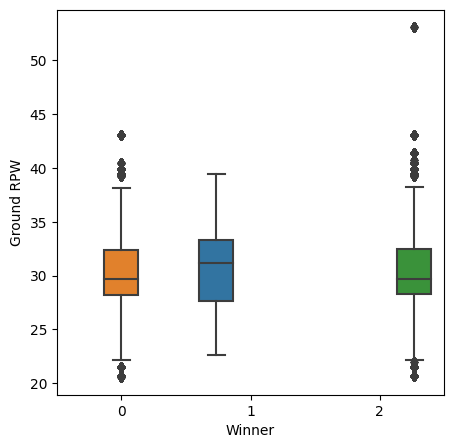

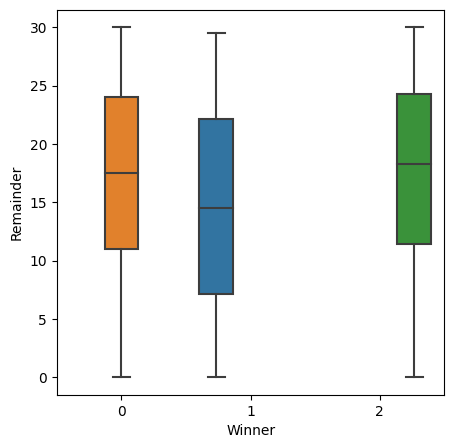

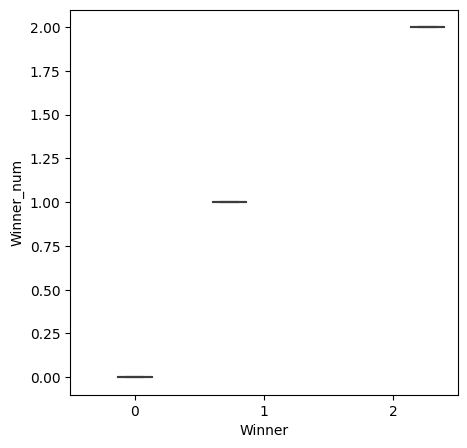

In [26]:
for a in attributes:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='Winner_num', y=a, data=data_train, hue='Winner_num', hue_order=[1, 0, 2])
    plt.xlabel('Winner')
    plt.legend().set_visible(False)
    plt.show()

From the boxplots you can see some near separation between wickets taken and whether team 1 or team 2 win, but a mixture for tie, and similar for Remaining Team value.

Aside from some outliers, Ground RPO, Ground RPW and remaining overs and balls don't seem to predict whether team 1 or team 2 wins.

<Axes: >

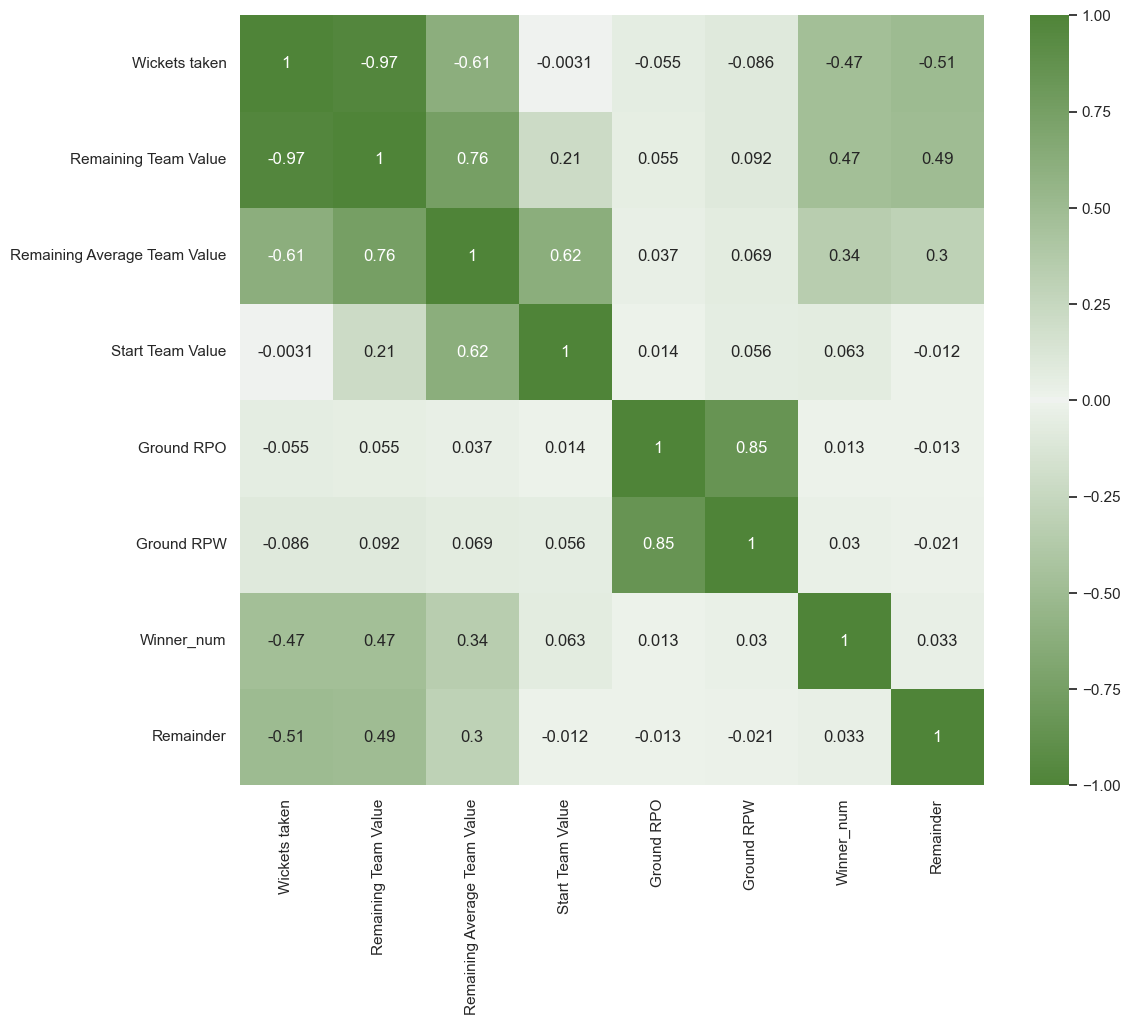

In [65]:
corr_matrix = data_train.corr(method = 'pearson')
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [66]:
skew = data_train.skew(axis='rows')
print(skew)

Wickets taken                   0.334510
Remaining Team Value           -0.140166
Remaining Average Team Value   -0.637628
Start Team Value                0.366907
Ground RPO                      0.959065
Ground RPW                      0.556951
Winner_num                      0.056006
Remainder                      -0.267428
dtype: float64


Correlation matrix shows strong correlation between Remaining Team Value and wickets taken, almost 1:1.  As expected Ground RPO and RPW also very highly correlated as well as Remaining Team Value and Remaining Average Team Value

Defining/ importing functions to perform scaling (MinMax or StandardScaler) as well as SMOTE.  And a function to take the data that is split into x and y and put it back into a dataframe

In [67]:
#own module which takes in df for train, test and val and returns in x and y format.  Can also sample.
from data_formatting import data_format

In [68]:
from sklearn.preprocessing import MinMaxScaler

def mm(trainx, testx, valx):
    
    #MinMaxScaler - Normalisation is rescaling the data so that all values are within the range of 0 and 1
    X_scaler = MinMaxScaler(feature_range=(0,1))
    X_scaler.fit(trainx)
    trainx_norm = X_scaler.transform(trainx)
    testx_norm = X_scaler.transform(testx)
    valx_norm = X_scaler.transform(valx)

    trainx_norm = pd.DataFrame(trainx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    testx_norm = pd.DataFrame(testx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    valx_norm = pd.DataFrame(valx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])

    return(trainx_norm, testx_norm, valx_norm)

In [69]:
from sklearn.preprocessing import StandardScaler
def ss(trainx, testx, valx):
    scaler = StandardScaler()
    scaler.fit(trainx)
    trainx = scaler.transform(trainx)
    testx = scaler.transform(testx)
    valx = scaler.transform(valx)

    trainx = pd.DataFrame(trainx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    testx = pd.DataFrame(testx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])
    valx = pd.DataFrame(valx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remainder'])

    return (trainx, testx, valx)

In [70]:
#https://arxiv.org/abs/1106.1813
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9299283/

from imblearn.over_sampling import SMOTE

def imbalance(trainx, trainy, strategy):
    if strategy == 'auto':
        smote = SMOTE(sampling_strategy='auto', random_state=7)

    elif strategy == 'minority':
        smote = SMOTE(sampling_strategy='minority', random_state=7)
    trainx_smote, trainy_smote = smote.fit_resample(X_train, y_train)
    
    return(trainx_smote, trainy_smote)

In [71]:
def process(trainx, testx, valx, trainy, testy, valy):

    data_train_df = trainx.copy()
    data_train_df['Winner_num']= trainy

    data_test_df = testx.copy()
    data_test_df['Winner_num']= testy
    
    data_val_df = valx.copy()
    data_val_df['Winner_num']= valy

    return (data_train_df, data_test_df, data_val_df)    

Create different dataframes depending on the different 

In [72]:
#No df needed 
X_train, X_test, X_val, y_train, y_test, y_val = data_format(data_train, data_test, data_val, None, None)

In [73]:
#SMOTE min only
X_smin_train, y_smin_train = imbalance(X_train, y_train, 'minority')
data_smin_train_df, data_smin_test_df, data_smin_val_df = process(X_smin_train, X_test, X_val, y_smin_train, y_test, y_val)

In [74]:
#SMOTE auto only
X_smauto_train, y_smauto_train = imbalance(X_train, y_train, 'auto')
data_smauto_train_df, data_smauto_test_df, data_smauto_val_df = process(X_smauto_train, X_test, X_val, y_smauto_train, y_test, y_val)

In [75]:
#SMOTE min and MinMax
X_mm_train, X_mm_test, X_mm_val = mm(X_smin_train, X_test, X_val)
data_smin_mm_train_df, data_mm_test_df, data_mm_val_df = process(X_mm_train, X_mm_test, X_mm_val, y_smin_train, y_test, y_val)

In [76]:
#SMOTE min and SS
X_ss_train, X_ss_test, X_ss_val = ss(X_smin_train, X_test, X_val)
data_smin_ss_train_df, data_ss_test_df, data_ss_val_df = process(X_ss_train, X_ss_test, X_ss_val, y_smin_train, y_test, y_val)

In [79]:
#Smote min only
data_smin_train_df.to_csv('data_smin_train_csv')

In [80]:
#Smote auto only
data_smauto_train_df.to_csv('data_smauto_train_csv')
#Use the data_test and data_val set as SMOTE doesn't affect the test or val set

In [81]:
##Smote min and minmax
data_smin_mm_train_df.to_csv('data_smin_mm_train_csv')
data_mm_test_df.to_csv('data_mm_test_csv')
data_mm_val_df.to_csv('data_mm_val_csv')

In [82]:
##Smote and ss
data_smin_ss_train_df.to_csv('data_smin_ss_train_csv')
data_ss_test_df.to_csv('data_ss_test_csv')
data_ss_val_df.to_csv('data_ss_val_csv')